In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt


In [2]:
# Downloading training data

training_data = datasets.FashionMNIST(
    root = 'data',
    train= True,
    download = True,
    transform = ToTensor(),
)




# Downloading test data

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download = True,
    transform = ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 303kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.66MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 17.7MB/s]


In [3]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [4]:
batch_size = 64

# Data Loaders:

train_dataloader = DataLoader(training_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data,batch_size = batch_size)

for X,y in test_dataloader:
    print("Shape of X[N,C,H,W]",X.shape)
    print("Shape of y: ",y.shape,y.dtype)
    break

Shape of X[N,C,H,W] torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [5]:
# Getting cpu or gpu device for training

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


#**Defining the Neural Network Model:**

In [6]:
class NeuralNetwork(nn.Module):

  def __init__(self):
    super(NeuralNetwork, self).__init__()

    self.flatten = nn.Flatten()

    # Hidden Layers with ReLU activation function
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10) # Output layer
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits


model= NeuralNetwork().to(device)

print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [7]:
# Cross Entropy Loss as it is a multiclass classification problem

loss_fn = nn.CrossEntropyLoss()

# Optimizer -> SGD -> Stochastic Gradient Descent
# lr = Learning Rate
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

#**Model Training:**

In [8]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()

  for batch, (X, y) in enumerate(dataloader):
    X, y= X.to(device), y.to(device)

    pred = model(X)
    loss = loss_fn(pred, y)

    # BackPropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch %100 ==0 :
      loss, current = loss.item(), batch * len(X)
      print(f"Loss: {loss} [{current}/{size}]")

In [9]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)

  num_batches = len(dataloader)

  model.eval()

  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)

      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches # average loss per batch
  correct /= size # %age of correct predictions or accuracy

  print(f"Test Error: \n Accuracy: {100*correct} %, Avg loss {test_loss}\n")




In [10]:
epochs = 1
for t in range(epochs):
  print(f"Epoch {t+1} \n --------------------------")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)

print("Done\n")

Epoch 1 
 --------------------------
Loss: 2.298403263092041 [0/60000]
Loss: 2.2947700023651123 [6400/60000]
Loss: 2.27718186378479 [12800/60000]
Loss: 2.2706146240234375 [19200/60000]
Loss: 2.2645487785339355 [25600/60000]
Loss: 2.230264902114868 [32000/60000]
Loss: 2.2342162132263184 [38400/60000]
Loss: 2.200155019760132 [44800/60000]
Loss: 2.192373037338257 [51200/60000]
Loss: 2.1732542514801025 [57600/60000]
Test Error: 
 Accuracy: 50.629999999999995 %, Avg loss 2.1662813265612173

Done



In [11]:
#saving model
torch.save(model.state_dict(), "model.pth")
print("Saved model state to model.pth")

Saved model state to model.pth


In [23]:
## Prediction

classes = [
    "T-shirt/top",

"Trouser",

"Pullover",

"Dress",

"Coat",

"Sandal",

"Shirt",

"Sneaker",

"Bag",

"Ankle boot"

]


model.eval()

x, y = test_data[7][0], test_data[7][1]
x = x.to(device)

# y = y.to(device) - Will give error if I write this

with torch.no_grad():
  pred = model(x)
  predicted, actual = classes[pred[0].argmax(0)], classes[y]

  print(f"Predicted: {predicted} Actual: {actual}")




Predicted: Pullover Actual: Shirt


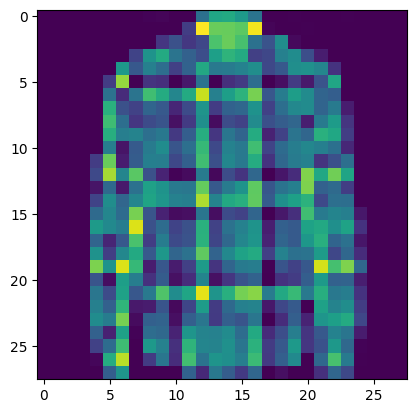

In [24]:
import matplotlib.pyplot as plt

# Assuming 'x' contains the image data
plt.imshow(x.cpu().squeeze())
plt.show()